### 目的：k-NNで利益を予測し（回帰モデル）、k-NNが予測する利益と、経営者が予測する利益の精度を比較する ###

# 1. 必要なライブラリをインストール・インポート

In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# 2. データの読み込み（Excelファイル）

In [173]:
# Mount Google Drive to access the file.
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/github/利益予測データベース.xlsx"  # アップロードしたファイルのパス
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. 目的変数と説明変数を選択

In [174]:
data = df.values
target = df.columns[2:3]
features = df.columns[3:8]
# features = df.columns[3:60]
# features = df.columns[3:4]

X = df[features]
y = df[target]

print(X)
print(y)

          ni_t1     ni_t2     ni_t3     ni_t4     ni_t5
0      0.077657  0.073253  0.097867  0.098210  0.067920
1      0.079182  0.105787  0.106157  0.073416  0.066011
2      0.069586  0.069830  0.048293  0.043422  0.039038
3      0.060812  0.042056  0.037814  0.033996  0.031088
4      0.055463  0.049869  0.044834  0.040998  0.037042
...         ...       ...       ...       ...       ...
51014 -0.070314  0.011884  0.027729  0.051827  0.048856
51015  0.011375  0.026541  0.049606  0.046762  0.060981
51016  0.026731  0.049961  0.047097  0.061417  0.077646
51017  0.046526  0.043858  0.057194  0.072307  0.088013
51018  0.109087  0.088073  0.067059  0.054389  0.049444

[51019 rows x 5 columns]
           ni_t
0      0.053142
1      0.083942
2      0.052085
3      0.060600
4      0.080197
...         ...
51014 -0.064041
51015 -0.067300
51016  0.011456
51017  0.024893
51018  0.104142

[51019 rows x 1 columns]


# 4. 訓練データとテストデータを70:30で分割（ランダム抽出）

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. 標準化の適用

In [176]:
# from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 6. k-NN回帰モデルの作成

In [217]:
knn = KNeighborsRegressor(n_neighbors=500)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=500)

# 7. 予測の実行

In [218]:
y_pred_knn = knn.predict(X_test)
# y_pred_knn = knn.predict(X_test_scaled)

# 8. k-NN予測と実際利益のスピアマン相関係数

In [219]:
from scipy.stats import spearmanr
corr_knn, _ = spearmanr(y_test, y_pred_knn)

# 9. 経営者予測と実際利益のスピアマン相関係数

In [220]:
y_mng = df.loc[y_test.index, "ni_t_mgt"]  # テストデータに合わせる
y_test = y_test.squeeze()
y_mng = y_mng.squeeze()
df_corr = pd.DataFrame({'test': y_test, 'mng': y_mng}).dropna()

In [222]:
corr_mng, _ = spearmanr(df_corr['test'], df_corr['mng'])

# 10. スピアマン相関係数の比較

In [223]:
print("【利益の金額を予測する回帰モデルの分析結果】")
print(f"k-NN予測と実際利益のスピアマン相関係数: {corr_knn:.4f}")
print(f"経営者予測と実際利益のスピアマン相関係数: {corr_mng:.4f}")

【利益の金額を予測する回帰モデルの分析結果】
k-NN予測と実際利益のスピアマン相関係数: 0.5506
経営者予測と実際利益のスピアマン相関係数: 0.6649


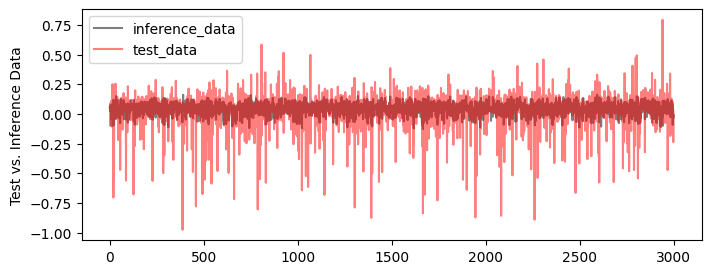

In [224]:
# @title 可視化

np_y_test = np.array(y_test)

fig,ax1 = plt.subplots(figsize=(8, 3))

# 可視化するターゲットのインデックス（最初の3つ）


#for i in range(len(target_indices)):
ax1.plot(y_pred_knn[:3000], color='black', alpha=0.5, label='inference_data')
ax1.plot(np_y_test[:3000], color='red', alpha=0.5, label='test_data')

ax1.set_ylabel('Test vs. Inference Data')
ax1.legend()
plt.show()

In [226]:
print(y_test)
print(y_pred_knn)

47941    0.057304
36274    0.057072
11427   -0.097538
17122    0.087908
10317    0.028233
           ...   
43875    0.086662
27510    0.080827
29971    0.207761
37926    0.085155
22964    0.024325
Name: ni_t, Length: 15306, dtype: float64
[0.04776432 0.06838147 0.03175904 ... 0.10853304 0.07388587 0.04983738]


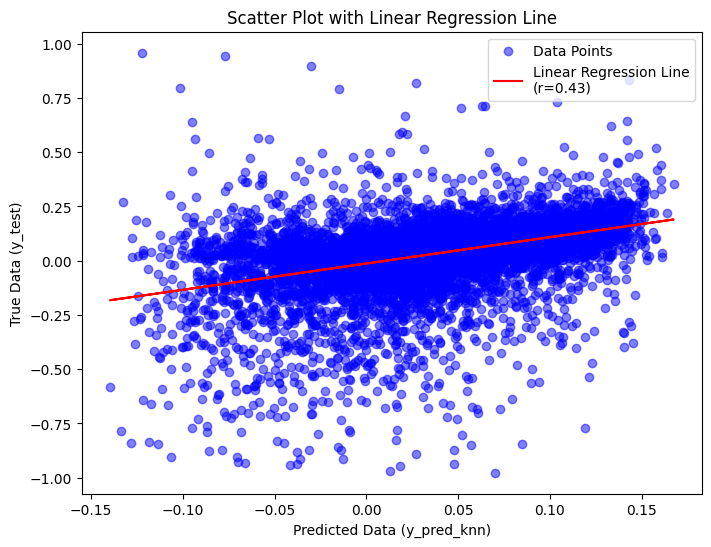

In [225]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

y_pred_knn = y_pred_knn.ravel()

# 線形回帰を計算

slope, intercept, r_value, p_value, std_err = linregress(y_pred_knn, y_test)

# 回帰線の計算
regression_line = slope * y_pred_knn + intercept

# 散布図を作成
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(y_pred_knn, y_test, alpha=0.5, color='blue', label='Data Points')
ax1.plot(y_pred_knn, regression_line, color='red', label=f'Linear Regression Line\n(r={r_value:.2f})')
ax1.set_xlabel('Predicted Data (y_pred_knn)')
ax1.set_ylabel('True Data (y_test)')
ax1.set_title('Scatter Plot with Linear Regression Line')
ax1.legend()
plt.show()